# Fashion MNIST - Categorical Classification
## (Fashion_mnist_김혜빈)

# Import Tensorflow & Keras

- import Keras

In [ ]:
import keras
keras.__version__

'2.4.3'

# Ⅰ. Fashion MNIST Data_Set Load & Review

> ## 1) Load Fashion MNIST Data_Set

In [ ]:
from keras.datasets import fashion_mnist
(train_data, train_targets), (X_test, y_test) = fashion_mnist.load_data()

- Train_Data Information

In [ ]:
print(len(train_data))
print(train_data.shape) # 이미지 6만장이 28 x 28의 일정한 크기로 구성되어 있다

print(len(train_targets))
print(train_targets[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


- Test_Data Information

In [ ]:
print(len(X_test))
print(X_test.shape) # 이미지 1만장이 28 x 28의 일정한 크기로 구성되어 있다


print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


> ## 2) Train & Validation Split

- Train : Validation : Test = 48000 : 12000 : 10000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

> ## 3) Visualization

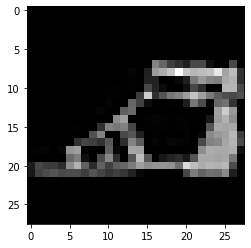

In [ ]:
import matplotlib.pyplot as plt
digit = X_train[0]  # 9인지 확인
plt.imshow(digit, cmap = 'gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(linewidth = 150) 

print(X_train[0]) # array로 확인

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0 132 101  62  49  31  72  71  15   0   0  70   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   5   0  32 156 172 194 25

# Ⅱ. Data Preprocessing

> ## 1) Reshape and Normalization

- reshape
   - (60000, 28, 28) to (60000, 28 * 28)
   - 한 차원 내린다

In [ ]:
X_train = X_train.reshape((48000, 28 * 28))
X_valid = X_valid.reshape((12000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_valid.shape, X_test.shape

((48000, 784), (12000, 784), (10000, 784))

- Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_valid = X_valid.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [ ]:
print(y_train[:5])
# 9, 0, 0, 3, 0 표현

print(y_valid[:5])
# 2, 2, 5, 9, 3 표현

print(y_test[:5])
# 9, 2, 1, 1, 6 표현

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


# Ⅲ. MNIST Keras Modeling

> ## 1) Model Define

- 모델 신경망 구조 정의
   - 2개의 Hidden Layers & 768개의 nodes
   - 복잡한 model capacity로 인한 overfitting을 예상해 Early Stopping & ModelCheckPoint 적용

In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential(name = 'EarlyStopping')
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,))) # 784 * 512 + 512
mnist.add(layers.Dense(256, activation = 'relu')) # 512 * 256 + 256
mnist.add(layers.Dense(10, activation = 'softmax')) # 256 * 10 + 10

- 모델 구조 확인

In [ ]:
mnist.summary()
# 파라미터가 53만개로 많다mnist.summary()
# 파라미터가 53만개로 많다

Model: "EarlyStopping"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

- 모델 학습방법 설정

In [ ]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
# 0 ~ 9를 분류해야 하니까 다중분류_CEE

> ## 3) EarlyStopping( )

- monitor : validation data의 loss가
- mode :  최소화(min)되는 지점을 찾아 
- patience : 그로부터 50번 이내에 더 낮은 값이 나오지 않는 다면 중지

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

> ## 4) ModelCheckpoint( )

- 'best_boston.h5' : 최적모델이 저장될 경로
- save_best_only : 최적모델만 저장할지 지정

In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_mnist.h5',
                     monitor = 'val_loss',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 5) Model Fit with callbacks

- callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정
- 약 5분 

In [ ]:
%%time
hist_mnist = mnist.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 120,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
400/400 [==============================] - 6s 13ms/step - loss: 0.7712 - accuracy: 0.7277 - val_loss: 0.4303 - val_accuracy: 0.8396

Epoch 00001: val_loss improved from inf to 0.43032, saving model to best_mnist.h5
Epoch 2/500
400/400 [==============================] - 5s 12ms/step - loss: 0.4073 - accuracy: 0.8512 - val_loss: 0.3921 - val_accuracy: 0.8570

Epoch 00002: val_loss improved from 0.43032 to 0.39207, saving model to best_mnist.h5
Epoch 3/500
400/400 [==============================] - 5s 12ms/step - loss: 0.3540 - accuracy: 0.8691 - val_loss: 0.3387 - val_accuracy: 0.8797

Epoch 00003: val_loss improved from 0.39207 to 0.33866, saving model to best_mnist.h5
Epoch 4/500
400/400 [==============================] - 5s 12ms/step - loss: 0.3224 - accuracy: 0.8811 - val_loss: 0.3744 - val_accuracy: 0.8633

Epoch 00004: val_loss did not improve from 0.33866
Epoch 5/500
400/400 [==============================] - 5s 12ms/step - loss: 0.2970 - accuracy: 0.8896 - val_loss: 0

> ## 6) 학습 결과 시각화 - Overfitting

- Loss Visualization

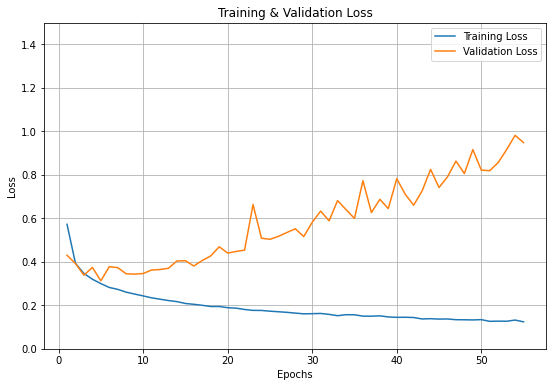

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylim(0, 1.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()
# overfitting 경향이 보인다.

> ## 7) Model Evaluate

In [ ]:
loss1, accuracy1 = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss1))
print('Accuracy = {:.5f}'.format(accuracy1))
# loss = 1.1123
# Accuracy = 0.887

313/313 [==============================] - 1s 3ms/step - loss: 1.1123 - accuracy: 0.8866
Loss = 1.11228
Accuracy = 0.88660


# Ⅳ. MNIST Keras Modeling with BatchNormalization

> ## 1) Keras Session Clear

In [ ]:
from keras import backend as K
K.clear_session()

> ## 2) Model Define

In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential(name = 'EarlyStopping')
mnist.add(layers.Dense(512, input_shape = (28 * 28,))) # 784 * 512 + 512
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation ('relu'))
mnist.add(layers.Dense(256)) # 512 * 256 + 256
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation ('relu'))
mnist.add(layers.Dense(10, activation = 'softmax')) # 256 * 10 + 10

In [ ]:
mnist.summary()

Model: "EarlyStopping"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)             

> ## 3) Model Compile


In [ ]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
# 0 ~ 9를 분류해야 하니까 다중분류_CEE

> ## 4) EarlyStopping( )

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

> ## 5) ModelCheckpoint( )

In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_mnist.h6',
                     monitor = 'val_loss',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 6) Model Fit with callbacks

- callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정
- 약 6분 

In [ ]:
%%time
hist_mnist = mnist.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 120,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
400/400 [==============================] - 7s 15ms/step - loss: 0.5590 - accuracy: 0.8008 - val_loss: 0.4278 - val_accuracy: 0.8501

Epoch 00001: val_loss improved from inf to 0.42776, saving model to best_mnist.h6
INFO:tensorflow:Assets written to: best_mnist.h6/assets
Epoch 2/500
400/400 [==============================] - 6s 14ms/step - loss: 0.3348 - accuracy: 0.8767 - val_loss: 0.3664 - val_accuracy: 0.8646

Epoch 00002: val_loss improved from 0.42776 to 0.36642, saving model to best_mnist.h6
INFO:tensorflow:Assets written to: best_mnist.h6/assets
Epoch 3/500
400/400 [==============================] - 6s 14ms/step - loss: 0.2876 - accuracy: 0.8933 - val_loss: 0.3596 - val_accuracy: 0.8702

Epoch 00003: val_loss improved from 0.36642 to 0.35960, saving model to best_mnist.h6
INFO:tensorflow:Assets written to: best_mnist.h6/assets
Epoch 4/500
400/400 [==============================] - 6s 14ms/step - loss: 0.2497 - accuracy: 0.9039 - val_loss: 0.3477 - val_accuracy: 0.8750

> ## 7) 학습 결과 시각화 - Overfitting

- Loss Visualization

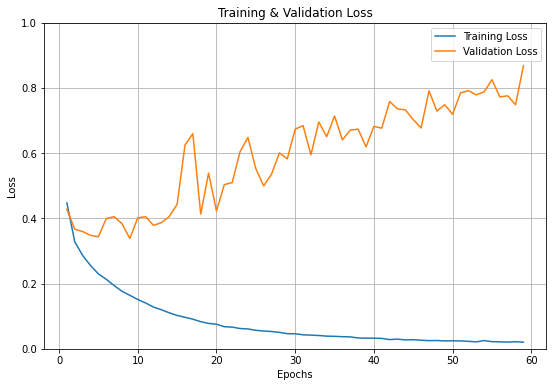

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.ylim(0, 1.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()
# 이전 모델에 비해 loss가 떨어지기 했으나 overfitting경향이 여전히 있다.

> ## 8) Model Evaluate

In [ ]:
loss2, accuracy2 = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss2))
print('Accuracy = {:.5f}'.format(accuracy2))
# loss = 0.92409
# Accuracy = 0.88810

313/313 [==============================] - 1s 3ms/step - loss: 0.9241 - accuracy: 0.8881
Loss = 0.92409
Accuracy = 0.88810


# Ⅴ. MNIST Keras Modeling with Dropout, BatchNormalization

- 동일한 부분은 위 모델 셀로 돌림

> ## 1) Keras Session Clear

> ## 2) Model Define & Compile

In [ ]:
from keras import models
from keras import layers

mnist = models.Sequential(name = 'EarlyStopping')
mnist.add(layers.Dense(512, input_shape = (28 * 28,))) # 784 * 512 + 512
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation ('relu'))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.Dense(256)) # 512 * 256 + 256
mnist.add(layers.BatchNormalization())
mnist.add(layers.Activation ('relu'))
mnist.add(layers.Dropout(0.5))
mnist.add(layers.Dense(10, activation = 'softmax')) # 256 * 10 + 10

In [ ]:
mnist.summary()

> ## 3) Model Compile

> ## 4) EarlyStopping( )

> ## 5) ModelCheckpoint( )

In [ ]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_mnist.h7',
                     monitor = 'val_loss',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 6) Model Fit with callbacks

- callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정
- 약 7분 

In [ ]:
%%time
hist_mnist = mnist.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 120,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
400/400 [==============================] - 7s 15ms/step - loss: 0.7717 - accuracy: 0.7294 - val_loss: 0.4183 - val_accuracy: 0.8466

Epoch 00001: val_loss improved from inf to 0.41826, saving model to best_mnist.h7
INFO:tensorflow:Assets written to: best_mnist.h7/assets
Epoch 2/500
400/400 [==============================] - 6s 15ms/step - loss: 0.4611 - accuracy: 0.8336 - val_loss: 0.3980 - val_accuracy: 0.8537

Epoch 00002: val_loss improved from 0.41826 to 0.39804, saving model to best_mnist.h7
INFO:tensorflow:Assets written to: best_mnist.h7/assets
Epoch 3/500
400/400 [==============================] - 6s 15ms/step - loss: 0.4111 - accuracy: 0.8531 - val_loss: 0.3576 - val_accuracy: 0.8738

Epoch 00003: val_loss improved from 0.39804 to 0.35759, saving model to best_mnist.h7
INFO:tensorflow:Assets written to: best_mnist.h7/assets
Epoch 4/500
400/400 [==============================] - 6s 15ms/step - loss: 0.3962 - accuracy: 0.8573 - val_loss: 0.3551 - val_accuracy: 0.8733

> ## 7) 학습 결과 시각화 - Overfitting

- Loss Visualization

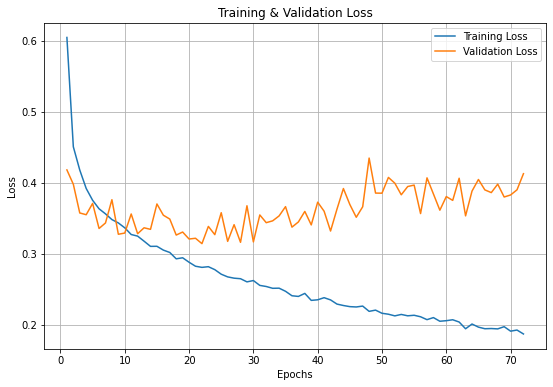

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()
# 이전 모델에 비해 loss가 떨어지기 했으나 overfitting경향이 여전히 있다.

> ## 8) Model Evaluate

In [ ]:
loss3, accuracy3 = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss3))
print('Accuracy = {:.5f}'.format(accuracy3))
# loss = 0.462
# Accuracy = 0.887

313/313 [==============================] - 1s 3ms/step - loss: 0.4621 - accuracy: 0.8868
Loss = 0.46209
Accuracy = 0.88680


> ## 9) Model Predict

- Probability

In [ ]:
np.set_printoptions(suppress = True, precision = 9)
print(mnist.predict(X_test[:1,:]))

[[0.000000001 0.          0.          0.          0.          0.000233667 0.          0.002718589 0.000000002 0.9970477  ]]


- Class

In [ ]:
print(mnist.predict_classes(X_test[:1,:]))

[9]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Ⅵ. 결론

In [ ]:
import pandas as pd
df_result = pd.DataFrame({
                          "Model" : ['Default', 'BN', 'BN + Dropout'],
                          "Accuracy" : [accuracy1, accuracy2, accuracy3],
                          "Val_Loss" : [loss1, loss2, loss3]})
                          
df_result.sort_values(by=['Accuracy'], axis=0, ascending=False)
# BN + Dropout 모델을 적용하는 것이 괜찮아 보인다.

,Model,Accuracy,Val_Loss
1,BN,0.8881,0.924086
2,BN + Dropout,0.8868,0.462093
0,Default,0.8866,1.112284


# Ⅶ. Model Save & Load

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [90]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 1740620
-rw------- 1 root root      20066 Mar  4 04:45 cat.1700.jpg
-rw------- 1 root root   69155672 Mar  4 04:46 creditCardFraud.zip
-rw------- 1 root root   90618980 Mar  4 04:51 dogs_and_cats_small.zip
drwx------ 2 root root       4096 Mar  9 04:28 image
-rw------- 1 root root    8204887 Mar  4 04:45 Images_500.zip
-rw------- 1 root root    4240457 Mar 15 04:04 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   12929865 Mar  4 04:42 Logo_Data.zip
-rw------- 1 root root   18272469 Mar  4 04:50 MNIST.csv
-rw------- 1 root root   22824989 Mar 11 00:13 Online_Retail.zip
-rw------- 1 root root        741 Mar  4 04:44 PII.csv
-rw------- 1 root root 1141460846 Mar  4 04:50 waferImages.zip
-rw------- 1 root root  414658234 Mar  4 04:49 yolo_weight.zip


In [97]:
mnist.save('/content/drive/My Drive/Colab Notebooks/models/003_best_mnist.h7')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/models/003_best_mnist.h7/assets


In [99]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 4298
-rw------- 1 root root 4353288 Mar 19 08:32 001_best_mnist.h5
-rw------- 1 root root   34592 Mar 17 07:32 001_model_iris.h5
drwx------ 4 root root    4096 Mar 19 08:32 002_best_mnist.h6
drwx------ 4 root root    4096 Mar 19 08:33 002_best_mnist.h7
drwx------ 4 root root    4096 Mar 19 08:33 003_best_mnist.h7
